# DriveToSurvive Sentiment Analysis

With this analysis we are looking for to goal mainly a global opinion about the Netflix show DriveToSurvive

In [1]:
import tweepy
import pandas as pd
import numpy as np
import re, nltk, spacy
import matplotlib.pyplot as plt

from textblob import TextBlob
from datetime import datetime
from TwitterAPI import TwitterAPI
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BISITE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

We need to know the password that was given to us in the Twitter Developer Portal

In [3]:
consumer_key = ''

consumer_secret = ''

access_token = ''

access_token_secret = ''

bearer_token = ''

api = TwitterAPI(consumer_key, consumer_secret, access_token, access_token_secret)

client = tweepy.Client(bearer_token)

Now we are going to search for recent tweets using the ``get_tweets`` function. This function searches for tweets on a specific topic

In [4]:
def get_tweets(topic):
        try:
            paginate = tweepy.Paginator(
                        client.search_recent_tweets,
                        topic, 
                        tweet_fields = ['lang'],
                        max_results = 100,  
                        limit = 15
            )
            tweets = []
            for tweet in paginate:
                tweets.append(tweet)
        except:
            tweets = [{"data": ""}]
        
        df_tweets = pd.DataFrame()
        for page in range(len(tweets)):
            new = pd.DataFrame(tweets[page][0])
            df_tweets = pd.concat([df_tweets, new], axis = 0)

        return df_tweets


In [5]:
df_tweets = get_tweets("DriveToSurvive")

In [6]:
df_tweets

,edit_history_tweet_ids,id,lang,text
0,[1630861805680467969],1630861805680467969,en,"RT @JoyridePod: ""hello Gene...""\n\nThe first r..."
1,[1630861708993413120],1630861708993413120,en,"""hello Gene...""\n\nThe first race week of the ..."
2,[1630857623481495552],1630857623481495552,en,Damn Carlos #DriveToSurvive https://t.co/n9iL...
3,[1630856851033325568],1630856851033325568,en,Best F1 Drive to Survive season yet. #Netflix ...
4,[1630855705476620289],1630855705476620289,en,@netflix I was wondering why #DriveToSurvive l...
...,...,...,...,...
95,[1629916647485231105],1629916647485231105,en,RT @HaasF1Team: You'd do what to the whole pad...
96,[1629916128712486914],1629916128712486914,en,Meanwhile a significant period of time was ded...
97,[1629915341785579521],1629915341785579521,en,I thought Vettel wasn't at all invited to spea...
98,[1629915288085856266],1629915288085856266,en,Every season of #DriveToSurvive makes me like ...


## Cleaning the data

Remove the non-English tweets, duplicates, reset the index and drop it

In [8]:
df_tweets = df_tweets[df_tweets['lang'] == 'en']
df_tweets = df_tweets.drop_duplicates(subset = 'text')
df_tweets = df_tweets.reset_index().drop(['index', 'edit_history_tweet_ids'], axis = 1)

In [9]:
df_tweets

,id,lang,text
0,1630861805680467969,en,"RT @JoyridePod: ""hello Gene...""\n\nThe first r..."
1,1630861708993413120,en,"""hello Gene...""\n\nThe first race week of the ..."
2,1630857623481495552,en,Damn Carlos #DriveToSurvive https://t.co/n9iL...
3,1630856851033325568,en,Best F1 Drive to Survive season yet. #Netflix ...
4,1630855705476620289,en,@netflix I was wondering why #DriveToSurvive l...
...,...,...,...
713,1629918718208745472,en,I wonder whether it was Vettel's choice not to...
714,1629917665086062596,en,I thought I wasn't getting enough of Yuki-Pier...
715,1629916128712486914,en,Meanwhile a significant period of time was ded...
716,1629915341785579521,en,I thought Vettel wasn't at all invited to spea...


By using the ```clean_text``` function, we can remove elements that may make our analysis more difficult.

In [10]:
def clean_text(text):
    # Remove emojis
    text = re.sub(r'[^\w\s,]', '', text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove ats
    text = re.sub(r'@\w+', '', text)

    #Remove symbols
    text = text.translate(str.maketrans('', '', '¿?¡!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'))
    
    # Remove RT word
    text  = re.sub(r'\bRT\b', '', text)
    
    #Lowercase the text
    text = text.lower()
    
    # Remove numbers
    text = re.sub("\d+", "", text)
    
    return text

With this second function we want to remove the stopwords from the text

In [11]:
def remove_stopwords(text):

    stop_words = set(stopwords.words('english'))

    tokens = word_tokenize(text)
    filtered_text = [word for word in tokens if not word.lower() in stop_words]

    clean_text = ' '.join(filtered_text)
    
    return clean_text


In [12]:
preprocess = lambda x: clean_text(x)
remove_StpWrds = lambda x: remove_stopwords(x)

df_tweets['clean_text'] = df_tweets['text'].apply(preprocess)
df_tweets['clean_text'] = df_tweets['clean_text'].apply(remove_StpWrds)

In [13]:
df_tweets

,id,lang,text,clean_text
0,1630861805680467969,en,"RT @JoyridePod: ""hello Gene...""\n\nThe first r...",joyridepod hello gene first race week season h...
1,1630861708993413120,en,"""hello Gene...""\n\nThe first race week of the ...",hello gene first race week season hope pre sea...
2,1630857623481495552,en,Damn Carlos #DriveToSurvive https://t.co/n9iL...,damn carlos drivetosurvive
3,1630856851033325568,en,Best F1 Drive to Survive season yet. #Netflix ...,best f drive survive season yet netflix good j...
4,1630855705476620289,en,@netflix I was wondering why #DriveToSurvive l...,netflix wondering drivetosurvive looked terrib...
...,...,...,...,...
713,1629918718208745472,en,I wonder whether it was Vettel's choice not to...,wonder whether vettels choice appear drivetosu...
714,1629917665086062596,en,I thought I wasn't getting enough of Yuki-Pier...,thought wasnt getting enough yukipierre broman...
715,1629916128712486914,en,Meanwhile a significant period of time was ded...,meanwhile significant period time dedicated da...
716,1629915341785579521,en,I thought Vettel wasn't at all invited to spea...,thought vettel wasnt invited speak mind last a...


## Sentiment Analysis

```get_sentiment_scores``` provides a measure of the sentiment of tweets.

In [14]:
def get_sentiment_scores(df):
    
    sentiment_scores = []

    for tweet in df['clean_text']:
        sentiment_scores.append(TextBlob(tweet).sentiment.polarity)

    df['sentiment_scores'] = sentiment_scores
    
    return df, sentiment_scores

To establish a threshold for when tweets are positive, neutral or negative, we made this box plot to get a better understanding of the distribution of the data.

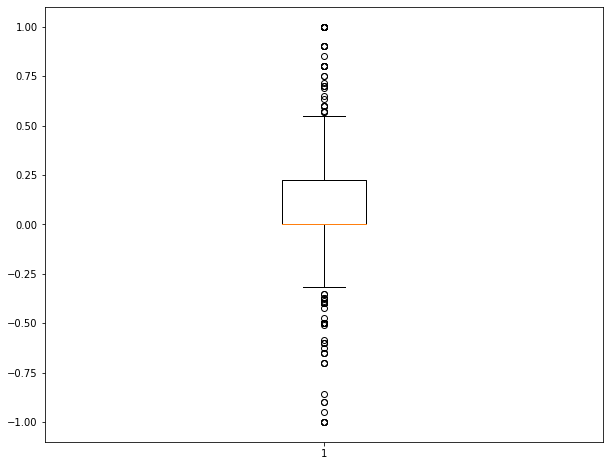

In [15]:
plt.figure(figsize=(10, 8))
df_scores, sentiment_scores = get_sentiment_scores(df_tweets)
plt.boxplot(sentiment_scores)
plt.show()

The function ```analyse_tweet_sentiment``` perform a sentiment analysis on each tweet and classify the sentiment as positive, negative or neutral.

In [16]:
def analyse_tweet_sentiment(df):
    
    positive_tweets = 0
    negative_tweets = 0
    neutral_tweets = 0
    
    df_scores, sentiment_scores = get_sentiment_scores(df)
    
    for score in sentiment_scores:
        if score > 0.15:
            positive_tweets = positive_tweets + 1
        elif score < 0:
            negative_tweets = negative_tweets + 1 
        else:
            neutral_tweets = neutral_tweets + 1

    # Calcula el porcentaje de tweets positivos, negativos y neutros
    total_tweets = len(sentiment_scores)
    positive_percent = positive_tweets / total_tweets * 100
    negative_percent = negative_tweets / total_tweets * 100
    neutral_percent = neutral_tweets / total_tweets * 100
    
    return positive_percent, negative_percent, neutral_percent

In [17]:
positive_percent, negative_percent, neutral_percent = analyse_tweet_sentiment(df_tweets)

## Plot the results

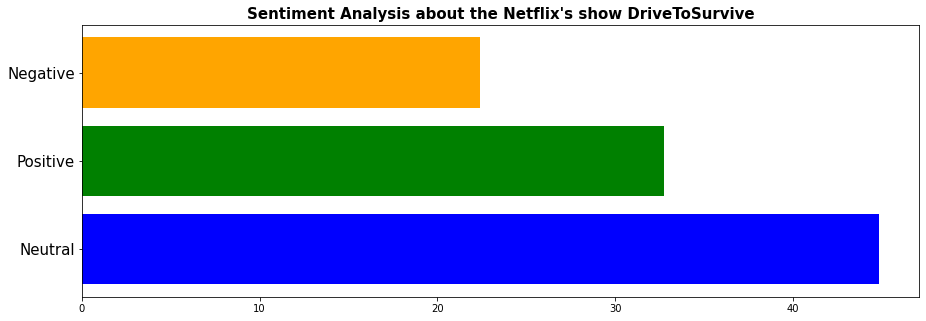

% of positive tweets 32.729805013927574 

% of negative tweets: 22.42339832869081 

% of neutral tweets: 44.84679665738162 

% average sentiment score: 7.951408818922745


In [18]:
plt.rcParams["figure.figsize"] = (15,5)

height = [neutral_percent, positive_percent, negative_percent]
bars = ['Neutral', 'Positive', 'Negative']

x_pos = np.arange(len(bars))

plt.barh(x_pos,
         height,
         color=['blue', 'green', 'orange']
        )

plt.title("Sentiment Analysis about the Netflix's show DriveToSurvive",
          fontsize = 15,
          fontweight = 'bold'
         )

plt.yticks(x_pos,
           bars,
           fontsize = 15
          )


plt.show()

print("% of positive tweets", positive_percent,'\n')
print("% of negative tweets:", negative_percent,'\n')
print("% of neutral tweets:", neutral_percent,'\n')
print("% average sentiment score:", 100 * sum(sentiment_scores) / len(sentiment_scores))


## Conclusion

As we can see, the neutral opinions are the most abundant, which may be due to the promotion of the show on Twitter.  
On the other hand, the positive and negative opinions are very close, therefore the positive opinions are higher.

The average score indicates that the opinion is neutral. As it is not possible to establish a clear conclusion, what could be done in the future is to take into account the emoticons in the analysis of the text and see if that way we can obtain a clearer conclusion.